In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import fitsio
import glob

import numpy as np
import healpy as hp
import astropy.io.fits as pyfits
import xlens

In [2]:
def get_ngal_in_healpix(catalog):
    # Set the NSIDE
    NSIDE = 1024
    npix = hp.nside2npix(NSIDE)
    
    # Initialize a count map
    ngal = np.zeros(npix, dtype=int)
    
    # RA, Dec of your galaxy catalog (in degrees)
    # These should be arrays of equal length
    ra = catalog['ra']        # shape (N,)
    dec = catalog['dec']      # shape (N,)
    
    # Convert to theta (colatitude) and phi (longitude) in radians
    theta = np.deg2rad(90.0 - dec)
    phi = np.deg2rad(ra)
    
    # Convert to HEALPix pixel indices (in NESTED ordering)
    pix = hp.ang2pix(NSIDE, theta, phi, nest=True)
    
    # Count galaxies per pixel
    np.add.at(ngal, pix, 1)
    return ngal

In [4]:
NSIDE = 1024
hp.nside2pixarea(NSIDE, degrees=True) * 3600 # arcmin2

11.802566885782033

In [6]:
hp.nside2pixarea(2048, degrees=True) * 3600 # arcmin2

2.9506417214455083

In [7]:
field_list = ["spring1", "spring2", "spring3", "autumn1", "autumn2", "hectomap"]
npix = hp.nside2npix(NSIDE)
ngals = np.zeros(npix, dtype=int)
for field in field_list:
    fname = f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal2/{field}.fits"
    data = fitsio.read(fname)
    ngals = ngals + get_ngal_in_healpix(data)

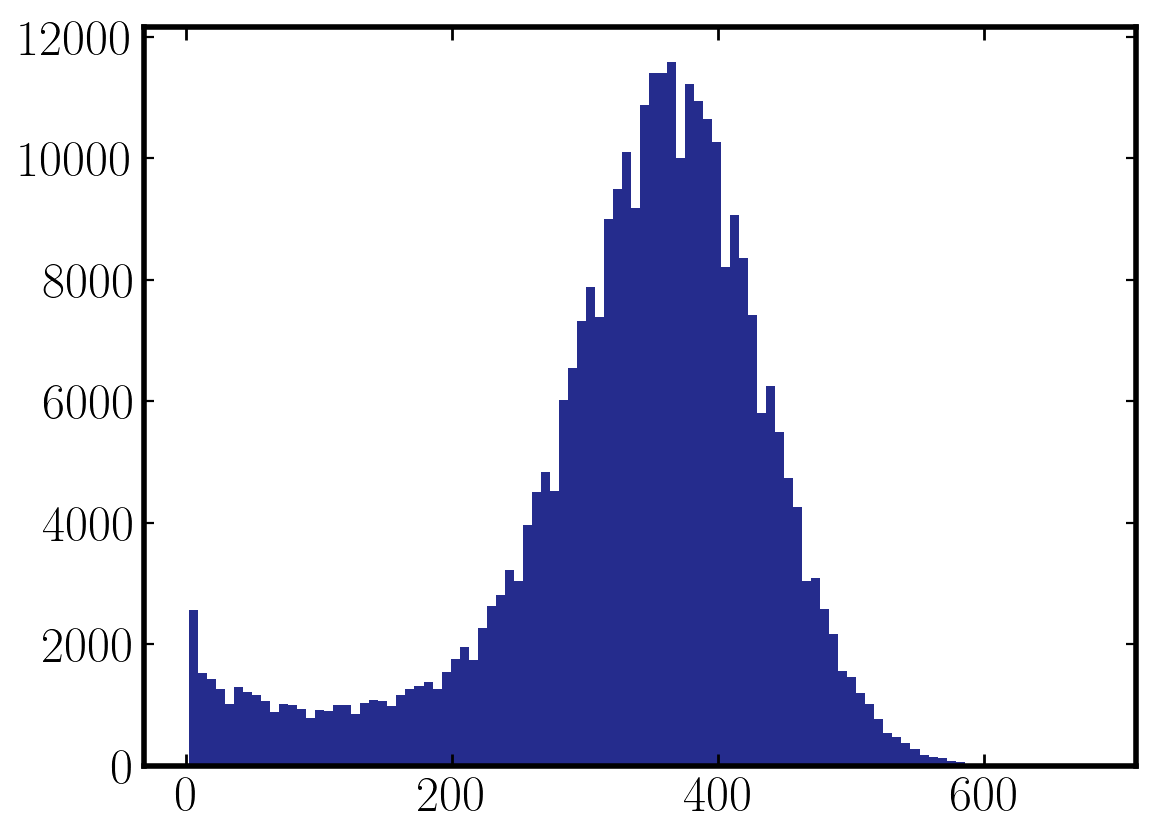

In [8]:
_ = plt.hist(ngals[ngals>1], bins=100)

In [9]:
mask = (ngals>5)
hp.write_map(
    "fdfc_hp_window.fits", 
    mask.astype(np.bool_),
    dtype=np.bool_, nest=True, 
    overwrite=True,
)

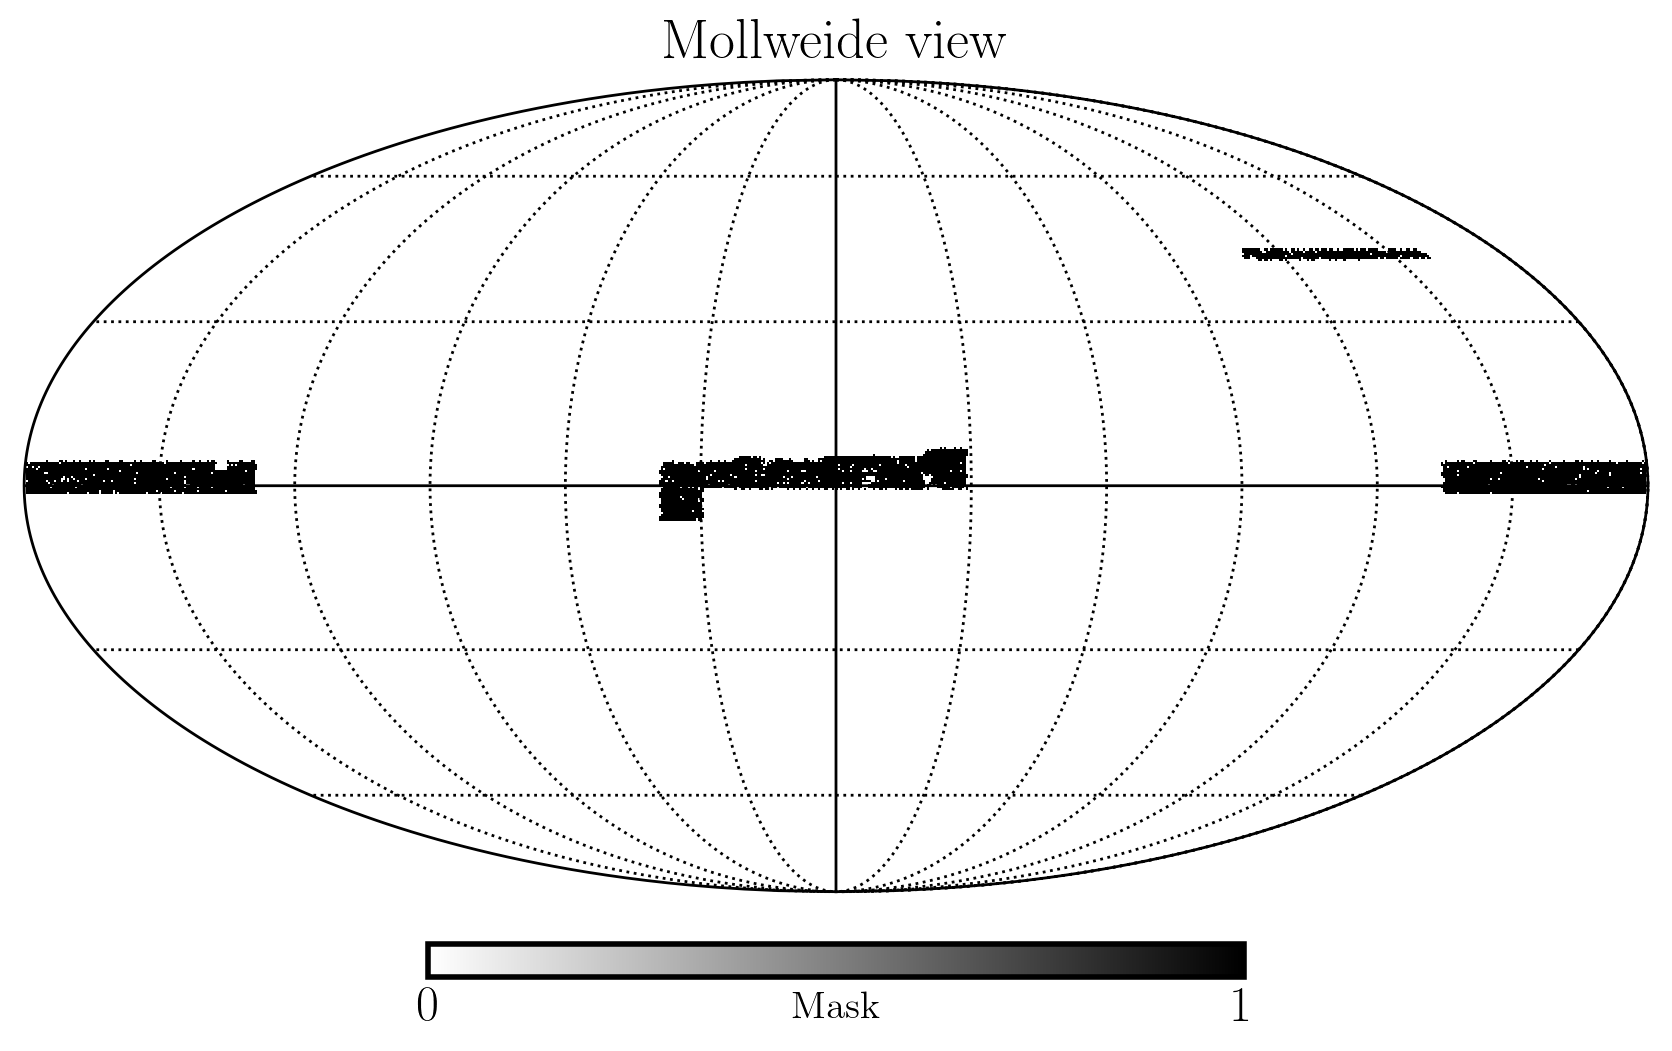

In [3]:
mask = hp.read_map("fdfc_hp_window.fits", nest=True, dtype=bool)
hp.mollview(mask.astype(float), nest=True, cmap="gray_r", unit="Mask")
hp.graticule()

plt.show()

In [11]:
field_list = ["spring1", "spring2", "spring3", "autumn1", "autumn2", "hectomap"]
NSIDE = 1024
for field in field_list:
    fname = f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/deepCoadd_anacal2/{field}.fits"
    data = pyfits.getdata(fname)
    # RA, Dec of your galaxy catalog (in degrees)
    # These should be arrays of equal length
    ra = data['ra']        # shape (N,)
    dec = data['dec']      # shape (N,)
    
    # Convert to theta (colatitude) and phi (longitude) in radians
    theta = np.deg2rad(90.0 - dec)
    phi = np.deg2rad(ra)
    
    # Convert to HEALPix pixel indices (in NESTED ordering)
    pix = hp.ang2pix(NSIDE, theta, phi, nest=True)
    mm = mask[pix]
    data = data[mm]
    print(np.sum(mm) / len(mm))
    pyfits.writeto(fname, data, overwrite=True)
    del data

0.9999461706047191
0.9999516118515117
0.9999637395375703
0.9999292947708643
0.9999230034286593
0.9999063087084163


In [12]:
field_list = ["spring1", "spring2", "spring3", "autumn1", "autumn2", "hectomap"]
NSIDE = 1024
for field in field_list:
    fname = f"/gpfs02/work/xiangchong.li/work/hsc_data/s23b/db_stars/{field}.fits"
    data = pyfits.getdata(fname)
    ra = data['i_ra']        
    dec = data['i_dec']     
    
    theta = np.deg2rad(90.0 - dec)
    phi = np.deg2rad(ra)
    
    # Convert to HEALPix pixel indices (in NESTED ordering)
    pix = hp.ang2pix(NSIDE, theta, phi, nest=True)
    mm = mask[pix]
    data = data[mm]
    print(np.sum(mm) / len(mm))
    pyfits.writeto(fname, data, overwrite=True)
    del data

0.9940237693393307
0.9955035150416098
0.9955717160878379
0.9938660713399154
0.9945501759878842
0.9955437729179639


In [4]:
np.sum(mask) * 11.802566885782033 / 3600

1048.5531560960821